In [34]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


In [47]:
d = pd.read_csv("combined.csv")
d2 = d[(d['SourcenumRecordsOutPerSecond_avg'] >= (d['rate'] * 0.95)) & (d.i == 0) & (d.nmappers <= 16)]

In [48]:
print(d2.columns)

Index(['Unnamed: 0', 'sleepdisable', 'i', 'itr', 'dvfs', 'rate', 'policy',
       'nmappers', 'pkg_watts_avg', 'pkg_watts_std', 'ram_watts_avg',
       'ram_watts_std', 'SinknumRecordsInPerSecond_avg',
       'SinknumRecordsInPerSecond_std', 'SinknumRecordsOutPerSecond_avg',
       'SinknumRecordsOutPerSecond_std', 'SinkbusyTimeMsPerSecond_avg',
       'SinkbusyTimeMsPerSecond_std', 'SinkbackPressuredTimeMsPerSecond_avg',
       'SinkbackPressuredTimeMsPerSecond_std', 'SinkbusyTime_%',
       'SinkbackPressuredTime_%', 'SourcenumRecordsInPerSecond_avg',
       'SourcenumRecordsInPerSecond_std', 'SourcenumRecordsOutPerSecond_avg',
       'SourcenumRecordsOutPerSecond_std', 'SourcebusyTimeMsPerSecond_avg',
       'SourcebusyTimeMsPerSecond_std',
       'SourcebackPressuredTimeMsPerSecond_avg',
       'SourcebackPressuredTimeMsPerSecond_std', 'SourcebusyTime_%',
       'SourcebackPressuredTime_%', 'MappernumRecordsInPerSecond_avg',
       'MappernumRecordsInPerSecond_std', 'MappernumRecor

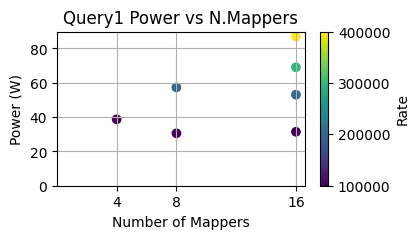

In [49]:
plt.figure(figsize=(4,2))
plt.scatter(d2['nmappers'], d2['pkg_watts_avg'], c=d2['rate'], cmap='viridis')
plt.colorbar(label='Rate')
plt.xticks(d2.nmappers.unique())
plt.xlabel('Number of Mappers')
plt.ylabel('Power (W)')
plt.title('Query1 Power vs N.Mappers')
plt.ylim(bottom=0)
plt.xlim(left=0)
plt.grid()
plt.savefig("query1.pdf")


# Analysis

We find at lower RPS rates (100K, 200K) that scaling up the number of Mappers results in lower power use for the same load, at 26% for 100K and 14% at 200K. When the Mapper node is getting more saturated (300K, 400K), we don't see this effect. 

In [50]:
d2[(d2.rate==100000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
0,4,38.71
4,8,30.57
8,16,31.44


In [51]:
d2[(d2.rate==200000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
23,8,57.31
27,16,53.07


In [52]:
d2[(d2.rate==300000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
46,16,69.06


In [53]:
d2[(d2.rate==400000)][['nmappers', 'pkg_watts_avg']]

,nmappers,pkg_watts_avg
64,16,86.96
